In [1]:
import sys
sys.path.append(r"C:\Users\afeki\Desktop\code\CrossValidatedFeatureSelection\experiments")  # path contains python_file.py
from plot_utils import get_regular_paths, get_feature_importance, plot_fi, plot_metrics

<Figure size 432x288 with 0 Axes>

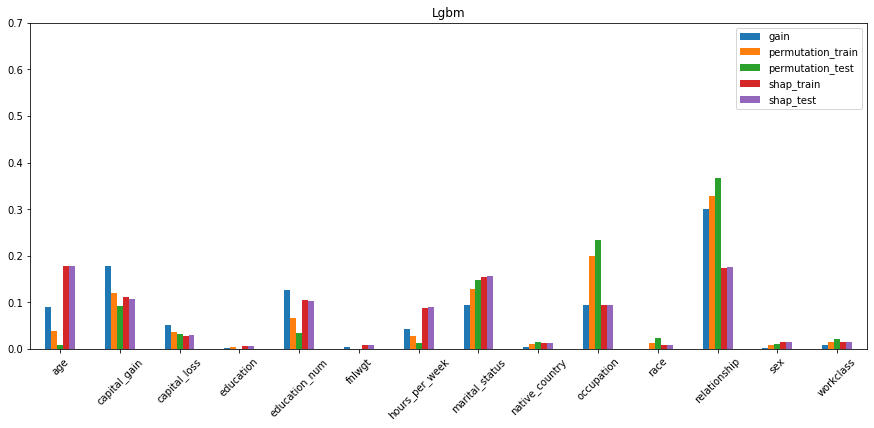

<Figure size 432x288 with 0 Axes>

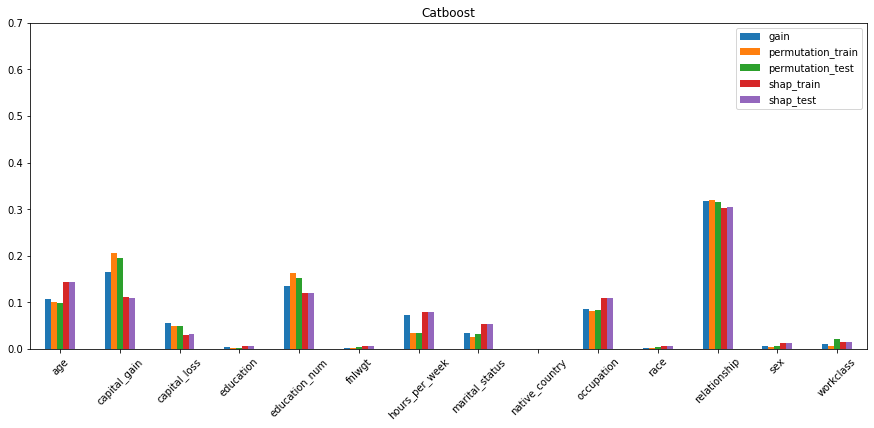

<Figure size 432x288 with 0 Axes>

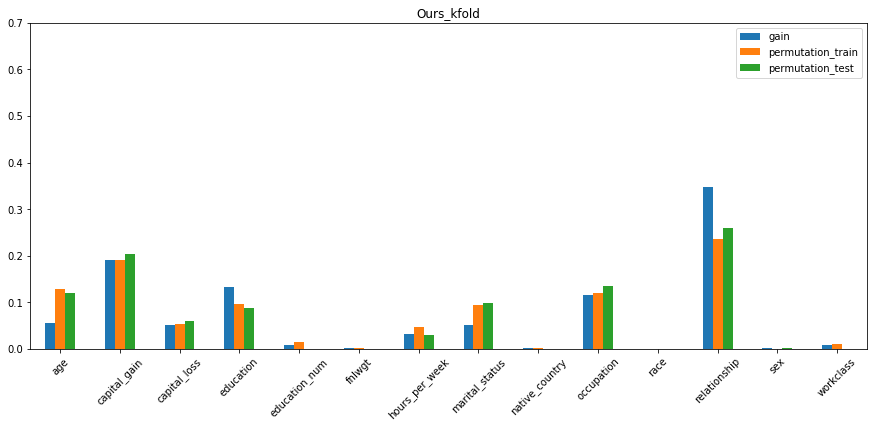

<Figure size 432x288 with 0 Axes>

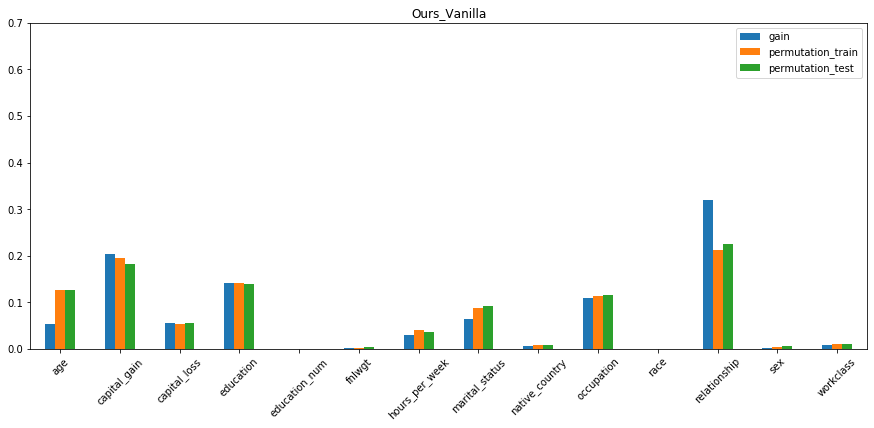

<Figure size 432x288 with 0 Axes>

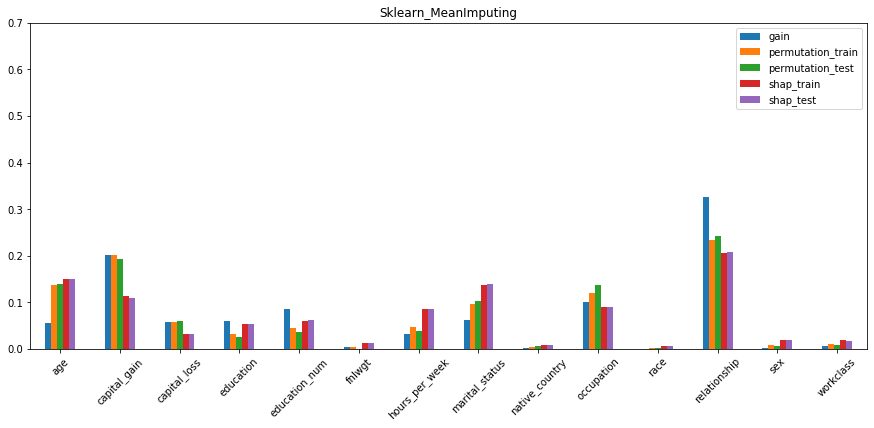

<Figure size 432x288 with 0 Axes>

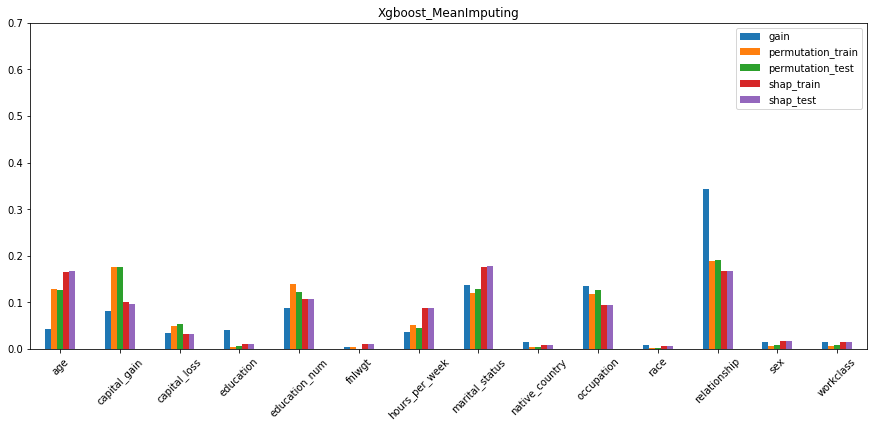

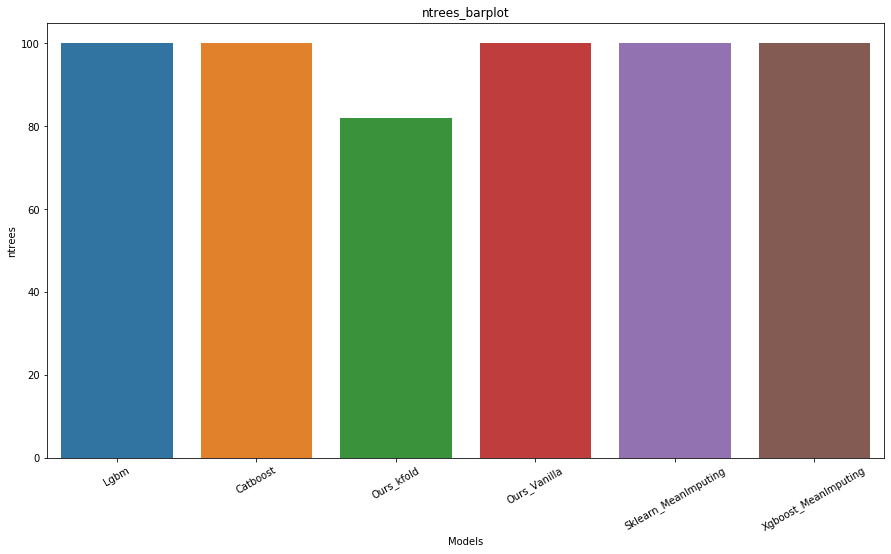

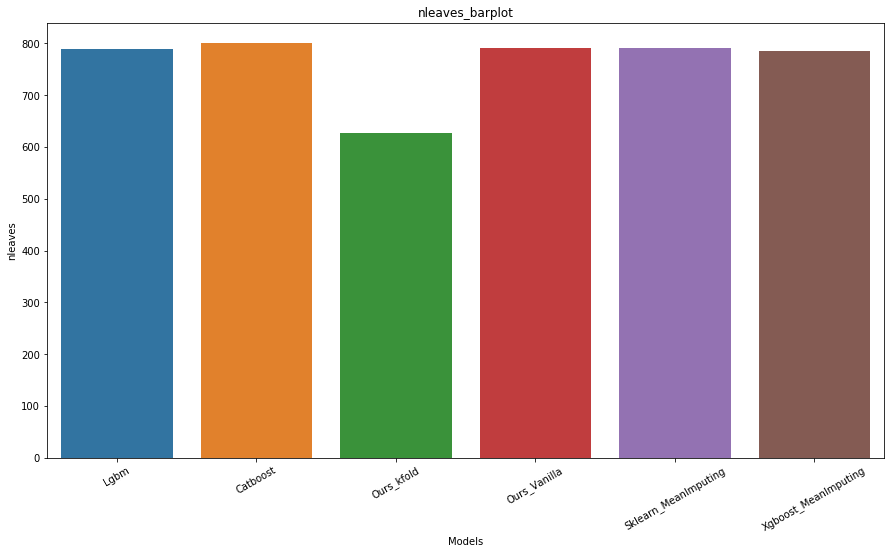

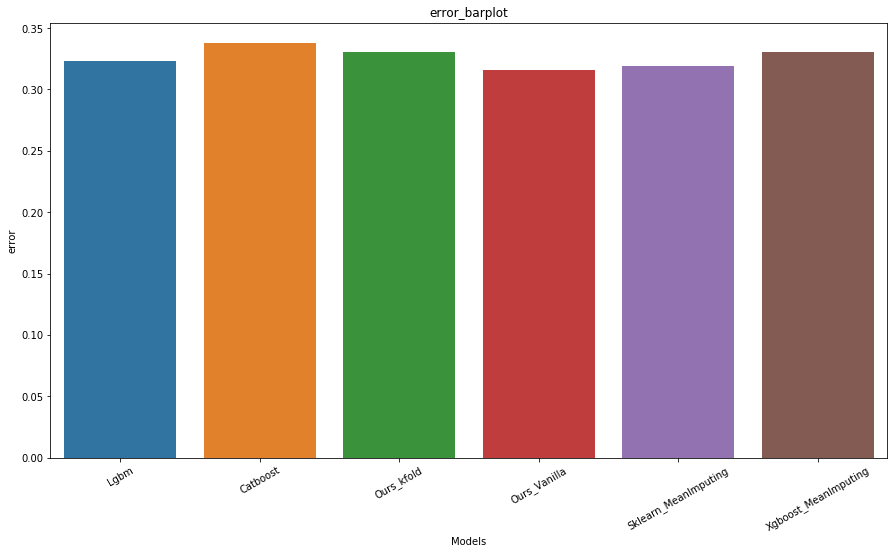

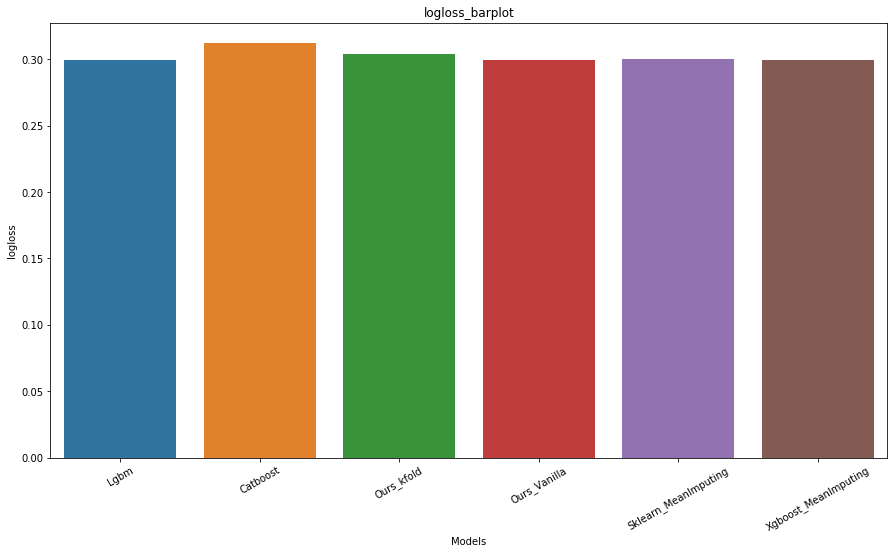

In [2]:
is_classification = True
metrics = ['ntrees', 'nleaves', 'error']
if is_classification:
    metrics += ['logloss']
paths = get_regular_paths(one_hot=False)
for model, model_path in paths.items():
    model_fi = get_feature_importance(model, model_path)
    plot_fi(model, model_fi)
for metric in metrics:
    plot_metrics(paths, metric)